In [11]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tupin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
news_tables = {}
tickers = ['AAPL', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [13]:
# Read one single day of headlines for 'AMZN' 
aapl = news_tables['AAPL']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
aapl_tr = aapl.findAll('tr')

for i, table_row in enumerate(aapl_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Apple Stock Has 5 Underappreciated Catalysts In The Year Ahead, Analyst Says
Mar-03-23 12:51PM
Why Apple Shares Were Higher Today
12:37PM
Top Apple Supplier Foxconn Plans Major India Expansion
11:18AM
Uniswap Wants to Launch Crypto Wallet App, but Apple Says Not So Fast
11:02AM


In [14]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AAPL',
  'Mar-03-23',
  '12:51PM',
  'Apple Stock Has 5 Underappreciated Catalysts In The Year Ahead, Analyst Says'],
 ['AAPL', 'Mar-03-23', '12:37PM', 'Why Apple Shares Were Higher Today'],
 ['AAPL',
  'Mar-03-23',
  '11:18AM',
  'Top Apple Supplier Foxconn Plans Major India Expansion'],
 ['AAPL',
  'Mar-03-23',
  '11:02AM',
  'Uniswap Wants to Launch Crypto Wallet App, but Apple Says Not So Fast'],
 ['AAPL',
  'Mar-03-23',
  '11:01AM',
  'Uniswap debuts sleek new crypto walletbut Apple wont accept it'],
 ['AAPL',
  'Mar-03-23',
  '10:19AM',
  'Morgan Stanley analysts cite subscription mania as core driver for Apple'],
 ['AAPL',
  'Mar-03-23',
  '10:10AM',
  'Apple Blocks Email App Update Over ChatGPT Age Concerns. Its Another Hurdle for AI.'],
 ['AAPL',
  'Mar-03-23',
  '10:09AM',
  'Apple Shutters Store After Repeated Gun Violence'],
 ['AAPL',
  'Mar-03-23',
  '09:36AM',
  'Top Apple Supplier Plans Major India Expansion'],
 ['AAPL',
  'Mar-03-23',
  '08:45AM',
  'Want to Get Rich

In [15]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AAPL,2023-03-03,12:51PM,Apple Stock Has 5 Underappreciated Catalysts I...,0.000,1.000,0.000,0.0000
1,AAPL,2023-03-03,12:37PM,Why Apple Shares Were Higher Today,0.000,0.694,0.306,0.2960
2,AAPL,2023-03-03,11:18AM,Top Apple Supplier Foxconn Plans Major India E...,0.000,0.795,0.205,0.2023
3,AAPL,2023-03-03,11:02AM,"Uniswap Wants to Launch Crypto Wallet App, but...",0.000,1.000,0.000,0.0000
4,AAPL,2023-03-03,11:01AM,Uniswap debuts sleek new crypto walletbut Appl...,0.195,0.805,0.000,-0.2924


C:\Users\Tupin\AppData\Local\Temp\ipykernel_13576\2208613761.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()


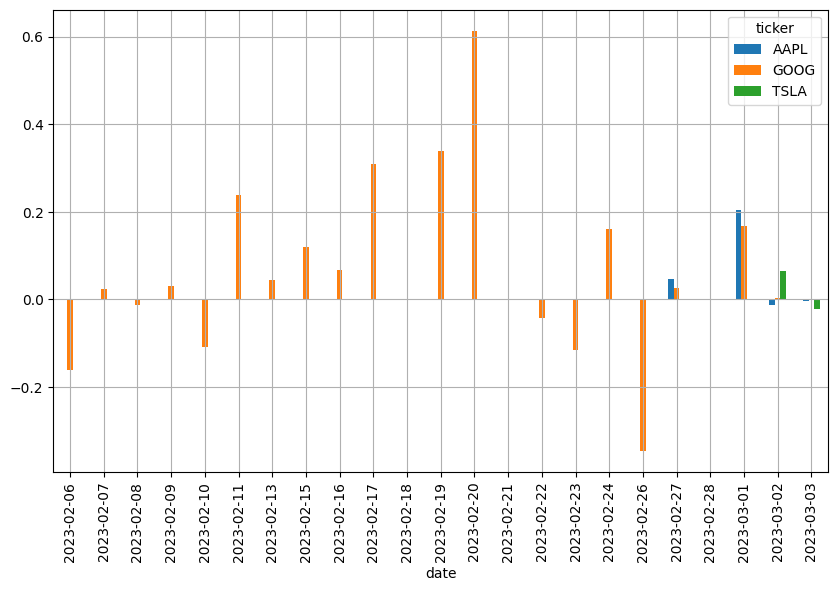

In [16]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()